<a href="https://colab.research.google.com/github/vghabroo/Gyan-of-GAN/blob/main/GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow
from tensorflow import keras
import keras.backend as K
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


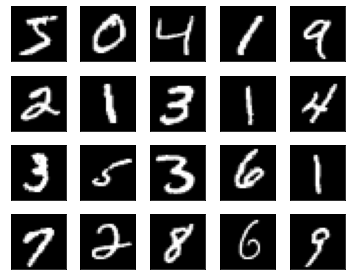

In [ ]:
plt.figure(figsize=(5, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

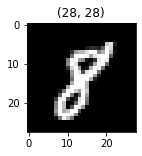

In [ ]:
sample = X_train[17]

plt.figure(figsize=(3, 2))
plt.title(sample.shape)
plt.imshow(sample, cmap='gray')
plt.show()

In [ ]:
X_train.min(), X_train.max()

(0, 255)

In [ ]:
def make_latent_samples(n_samples, sample_size):
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [ ]:
make_latent_samples(1, 100)

array([[ 0.48415307, -0.55469497,  1.02006185, -0.72081222,  1.18380677,
         1.71215421, -0.54297354, -0.5942587 ,  0.72100486, -0.55749616,
         0.13555016, -0.78415668,  0.73307708, -0.93656526, -1.82788057,
        -0.48942922,  0.28812803,  0.21161897,  0.91453326,  2.18653205,
        -0.38618282, -1.42513324, -1.12407086,  1.18463008,  1.20560064,
         0.9301034 ,  1.58869452,  0.71589885, -1.4320339 , -0.06809539,
        -0.14605178,  0.00722848, -1.41156475,  1.2144926 , -0.25443883,
        -0.5992515 , -0.65273266, -1.5772953 ,  0.65148978, -0.28693523,
         0.18253243, -0.4661498 ,  0.64247916,  0.65411276,  0.19228214,
         0.33139309, -0.95118686,  0.54261039,  0.99076071, -0.21234701,
         0.39660884,  0.21599012, -2.15940475, -1.33594315, -2.72205497,
        -0.7177117 ,  0.34856534,  0.67048345,  0.05477668,  1.47854684,
         0.32361487,  1.264951  ,  0.69509215,  0.84643749,  0.20441162,
        -2.57708266, -0.84134613,  0.78429715, -1.0

In [ ]:
generator = Sequential([
    Dense(128, input_shape=(100,)),
    LeakyReLU(alpha=0.01),
    Dense(784),
    Activation('tanh')
], name='generator')

generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 784)               101136    
                                                                 
 activation (Activation)     (None, 784)               0         
                                                                 
Total params: 114,064
Trainable params: 114,064
Non-trainable params: 0
_________________________________________________________________


In [ ]:
discriminator = Sequential([
    Dense(128, input_shape=(784,)),
    LeakyReLU(alpha=0.01),
    Dense(1),
    Activation('sigmoid')
], name='discriminator')

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
gan = Sequential([
    generator,
    discriminator
])

gan.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator (Sequential)      (None, 784)               114064    
                                                                 
 discriminator (Sequential)  (None, 1)                 100609    
                                                                 
Total params: 214,673
Trainable params: 214,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [ ]:
make_trainable(discriminator, False)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 100,609
Trainable params: 0
Non-trainable params: 100,609
_________________________________________________________________


In [ ]:
make_trainable(discriminator, True)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def make_simple_GAN(sample_size, 
                    g_hidden_size, 
                    d_hidden_size, 
                    leaky_alpha, 
                    g_learning_rate,
                    d_learning_rate):
    K.clear_session()
    
    generator = Sequential([
        Dense(g_hidden_size, input_shape=(sample_size,)),
        LeakyReLU(alpha=leaky_alpha),
        Dense(784),        
        Activation('tanh')
    ], name='generator')    

    discriminator = Sequential([
        Dense(d_hidden_size, input_shape=(784,)),
        LeakyReLU(alpha=leaky_alpha),
        Dense(1),
        Activation('sigmoid')
    ], name='discriminator')    
    
    gan = Sequential([
        generator,
        discriminator
    ])
    
    discriminator.compile(optimizer=Adam(lr=d_learning_rate), loss='binary_crossentropy')
    gan.compile(optimizer=Adam(lr=g_learning_rate), loss='binary_crossentropy')
    
    return gan, generator, discriminator 

In [ ]:
def preprocess(x):    
    x = x.reshape(-1, 784) 
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    return x

In [ ]:
X_train_real = preprocess(X_train)
X_test_real  = preprocess(X_test)

In [ ]:
def deprocess(x):
    x = (x / 2 + 1) * 255
    x = np.clip(x, 0, 255)
    x = np.uint8(x)
    x = x.reshape(28, 28)
    return x

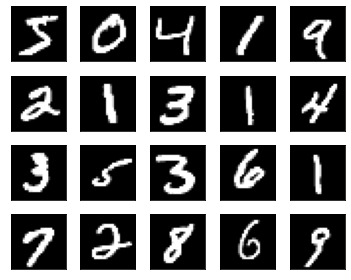

In [ ]:
plt.figure(figsize=(5, 4))
for i in range(20):
    img = deprocess(X_train_real[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

In [ ]:
y_real_10, y_fake_10 = make_labels(10)

y_real_10, y_fake_10

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]), array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [ ]:
sample_size     = 100     
g_hidden_size   = 128
d_hidden_size   = 128
leaky_alpha     = 0.01
g_learning_rate = 0.0001  
d_learning_rate = 0.001   
epochs          = 100
batch_size      = 64      
eval_size       = 16      
smooth          = 0.1

y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

gan, generator, discriminator = make_simple_GAN(
    sample_size, 
    g_hidden_size, 
    d_hidden_size, 
    leaky_alpha, 
    g_learning_rate,
    d_learning_rate)

losses = []
for e in range(epochs):
    for i in range(len(X_train_real)//batch_size):
        X_batch_real = X_train_real[i*batch_size:(i+1)*batch_size]
        
        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)
        
        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)

        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)
    
    X_eval_real = X_test_real[np.random.choice(len(X_test_real), eval_size, replace=False)]
    
    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss  = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss += discriminator.test_on_batch(X_eval_fake, y_eval_fake)
    g_loss  = gan.test_on_batch(latent_samples, y_eval_real) 
    
    losses.append((d_loss, g_loss))
    
    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f}".format(
        e+1, epochs, d_loss, g_loss))    

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch:   1/100 Discriminator Loss: 0.1447 Generator Loss: 3.0202
Epoch:   2/100 Discriminator Loss: 0.1326 Generator Loss: 4.0326
Epoch:   3/100 Discriminator Loss: 0.1533 Generator Loss: 2.1924
Epoch:   4/100 Discriminator Loss: 0.7042 Generator Loss: 1.0427
Epoch:   5/100 Discriminator Loss: 0.1201 Generator Loss: 2.8019
Epoch:   6/100 Discriminator Loss: 0.1877 Generator Loss: 3.3056
Epoch:   7/100 Discriminator Loss: 0.1933 Generator Loss: 3.3460
Epoch:   8/100 Discriminator Loss: 0.2757 Generator Loss: 2.4526
Epoch:   9/100 Discriminator Loss: 0.1716 Generator Loss: 2.8441
Epoch:  10/100 Discriminator Loss: 0.1783 Generator Loss: 2.9403
Epoch:  11/100 Discriminator Loss: 0.1723 Generator Loss: 3.0235
Epoch:  12/100 Discriminator Loss: 0.3477 Generator Loss: 1.7813
Epoch:  13/100 Discriminator Loss: 0.2470 Generator Loss: 2.4281
Epoch:  14/100 Discriminator Loss: 0.5475 Generator Loss: 1.6667
Epoch:  15/100 Discriminator Loss: 0.6034 Generator Loss: 3.9162
Epoch:  16/100 Discrimina

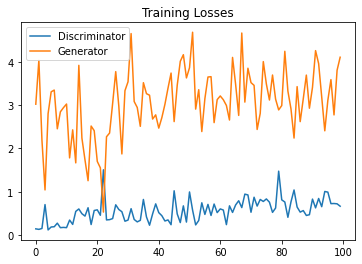

In [ ]:
losses = np.array(losses)

fig, ax = plt.subplots()
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

1/1 [==============================] - 0s 325ms/step


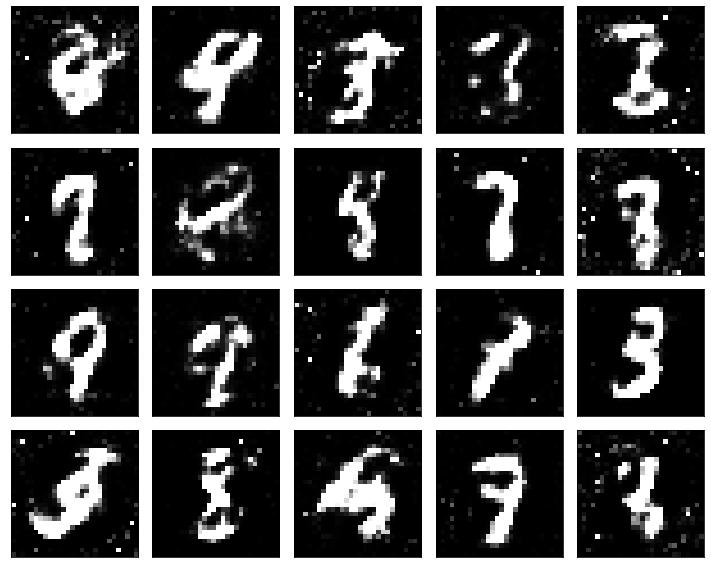

In [ ]:
latent_samples = make_latent_samples(20, sample_size)
generated_digits = generator.predict(latent_samples)

plt.figure(figsize=(10, 8))
for i in range(20):
    img = deprocess(generated_digits[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()